# <center>Analysis of Tests</center>

This file is an interactive notebook to analyze the data obtained from tests.

## Reading in the Data

First the match data must be read in.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics
np.random.seed(42)

# Read in the csv files
# Note: These all hold up to 50 hypergames at once
gamenames = ['montyhall', 'kriegTTT_4x4/numHyperGames_50', 'kriegTTT_5x5']
gamename_index = 2
gamename = gamenames[gamename_index]
file_name = 'testOutput/' + gamename + '/testOutput.csv'
data = pd.read_csv(file_name, header=0)

# Print the first 5 rows of the data
data.head()

,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_5x5_300_0,kriegTTT_5x5,2,1590537010157,10,300,OPLAYER,6,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_5x5_300_2,kriegTTT_5x5,2,1590537952271,10,300,OPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_5x5_300_3,kriegTTT_5x5,2,1590538147553,10,300,OPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_5x5_300_5,kriegTTT_5x5,2,1590538908502,10,300,OPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_5x5_300_6,kriegTTT_5x5,2,1590539037323,10,300,OPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0


Next, the move data should be read in for each match

*Note: time_to_update and time_to_select_move are in milliseconds*

In [2]:
move_list = list()
for match_name in data['match_id']:
    file_name = 'testOutput/' + gamename + '/moveset/' + match_name + '.csv'
    move_list.append(pd.read_csv(file_name, header=0))

# Verify by printing the head of the first game
move_list[0]

,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_5x5_300_0,kriegTTT_5x5,0,OPLAYER,imprandom,1,4,21,0,(MARK 1 1 )
1,hypertest_5x5_300_0,kriegTTT_5x5,0,XPLAYER,hyper,1,4,21,2163,(MARK 2 3 )
2,hypertest_5x5_300_0,kriegTTT_5x5,1,OPLAYER,imprandom,24,4,40,0,(MARK 1 2 )
3,hypertest_5x5_300_0,kriegTTT_5x5,1,XPLAYER,hyper,24,4,30,39741,(MARK 5 4 )
4,hypertest_5x5_300_0,kriegTTT_5x5,2,OPLAYER,imprandom,50,4,81,0,(MARK 5 3 )
5,hypertest_5x5_300_0,kriegTTT_5x5,2,XPLAYER,hyper,50,4,79,73497,(MARK 3 2 )
6,hypertest_5x5_300_0,kriegTTT_5x5,3,OPLAYER,imprandom,50,4,470,0,(MARK 3 1 )
7,hypertest_5x5_300_0,kriegTTT_5x5,3,XPLAYER,hyper,50,4,448,64486,(MARK 2 5 )
8,hypertest_5x5_300_0,kriegTTT_5x5,4,OPLAYER,imprandom,50,4,8229,0,(MARK 4 2 )
9,hypertest_5x5_300_0,kriegTTT_5x5,4,XPLAYER,hyper,50,4,8389,57280,(MARK 2 2 )


In [3]:
# # Only really relevant for monty-hall games
# count_switches = 0
# for idx, match in enumerate(move_list):
#     if(match['move_chosen'][2] == 'SWITCH'):
#         count_switches += 1
#     if(idx < 10):
#         print(match['match_id'][2] + ': ' + match['move_chosen'][2])
        
# print('\nPlayer chose to switch in ' + str(count_switches) + ' out of ' + str(len(move_list)) + ' games')

## Analysis of Data

### Overall Agent Results

The average score of the agent will be calculated across all games

The win/draw rate for the agent "HYPER" playing the game "kriegTTT_5x5" is 100.0% for 35 games


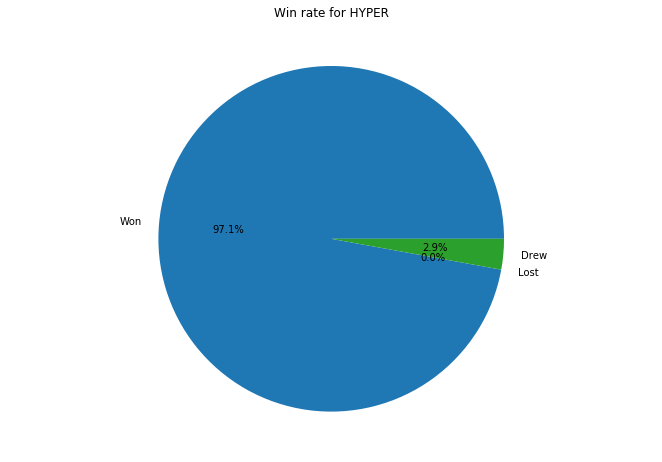

In [10]:
total_score = data['player_1_score'].sum(skipna = True)
total_count = data['player_1_score'].count()

print("The win/draw rate for the agent \"" + str(data['player_1'][0]) + "\" playing the game \"" + str(data['game_name'][0]) + "\" is " + str(total_score/total_count) + "% for " + str(total_count) + " games")

# Display a pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.axis('equal')
ax.set_title('Win rate for ' + str(data['player_1'][0]))
result = ['Won', 'Lost', 'Drew']
count = [len(data[(data['player_1_score'] == 100) & (data['player_2_score'] == 0)]), len(data[(data['player_1_score'] == 0) & (data['player_2_score'] == 100)]), len(data[(data['player_1_score'] == 100) & (data['player_2_score'] == 100)])]
ax.pie(count, labels = result,autopct='%1.1f%%')
plt.show()

It is worth considering how many of the 50 games run were successfully completed without catastrophic failure.

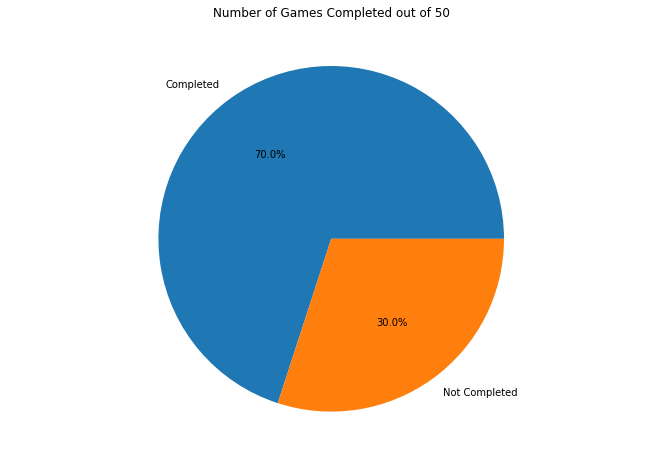

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.axis('equal')
ax.set_title('Number of Games Completed out of 50')
result = ['Completed', 'Not Completed']
count = [total_count, 50-total_count]
ax.pie(count, labels = result, autopct='%1.1f%%')
plt.show()

### Move Results

Calculating the average move time per game.
This is expected to grow with the depth of the game and is expected to be different for the state update and the move selection.

In [12]:
class Tracker:
    '''
    Tracker tracks the average time for each move of each game played
    '''
    def __init__(self):
        self.time_sum = 0
        self.num_moves = 0
        self.times = list()
    
    def __str__(self):
        return "time_sum: " + str(self.time_sum) + " ms\nnum_moves: " + str(self.num_moves) + "\nmean_time: " + str(statistics.mean(self.times)) + "\nmedian_time: " + str(statistics.median(self.times)) + " ms\ntimes (ms): " + str(self.times)
    
    def addMove(self, num):
        self.time_sum += num
        self.num_moves+=1
        self.times.append(num)
    
    def getMeanTime(self):
        return statistics.mean(self.times)
    
    def getMedianTime(self):
        return statistics.median(self.times)

# Add the results for each move of each game played to a list of trackers for the update and select move times for the chosen player      
time_to_update_list = list()
time_to_select_move_list = list()
player_name = data['role_1'][0].upper()
for move_set in move_list:
    for index, move_row in move_set.iterrows():
        if move_row['role_name'] == player_name:
            if move_row['step'] > len(time_to_update_list) - 1:
                time_to_update_list.append(Tracker())
                time_to_select_move_list.append(Tracker())
            time_to_update_list[move_row['step']].addMove(move_row['time_to_update'])
            time_to_select_move_list[move_row['step']].addMove(move_row['time_to_select_move'])

# Print the data
for idx, (update_step, select_step) in enumerate(zip(time_to_update_list, time_to_select_move_list)):
    print('Step: ' + str(idx) + "\n")
    print('Time taken to update states:')
    print(str(update_step)  + "\n")
    print('Time taken to select move:')
    print(str(select_step)  + "\n\n\n")

Step: 0

Time taken to update states:
time_sum: 69 ms
num_moves: 35
mean_time: 1.9714285714285715
median_time: 0 ms
times (ms): [21, 0, 0, 0, 0, 0, 0, 0, 6, 0, 6, 0, 0, 6, 0, 8, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 6, 0, 0, 0, 0, 0, 2]

Time taken to select move:
time_sum: 68835 ms
num_moves: 35
mean_time: 1966.7142857142858
median_time: 1920 ms
times (ms): [2163, 2094, 2070, 1913, 1792, 1850, 2059, 2122, 2013, 1835, 1937, 1913, 1896, 1811, 2006, 2132, 1870, 1916, 1914, 1833, 2060, 1911, 1849, 2179, 1892, 1933, 2022, 1945, 1910, 1920, 2231, 1872, 1962, 1911, 2099]



Step: 1

Time taken to update states:
time_sum: 1038 ms
num_moves: 35
mean_time: 29.65714285714286
median_time: 31 ms
times (ms): [30, 29, 38, 32, 15, 31, 41, 39, 31, 31, 31, 31, 21, 32, 31, 32, 31, 32, 31, 31, 31, 32, 32, 33, 33, 31, 22, 16, 22, 31, 31, 31, 21, 22, 30]

Time taken to select move:
time_sum: 1152797 ms
num_moves: 35
mean_time: 32937.05714285714
median_time: 34402 ms
times (ms): [39741, 1592, 35633, 34703, 1

Now I will graph the findings

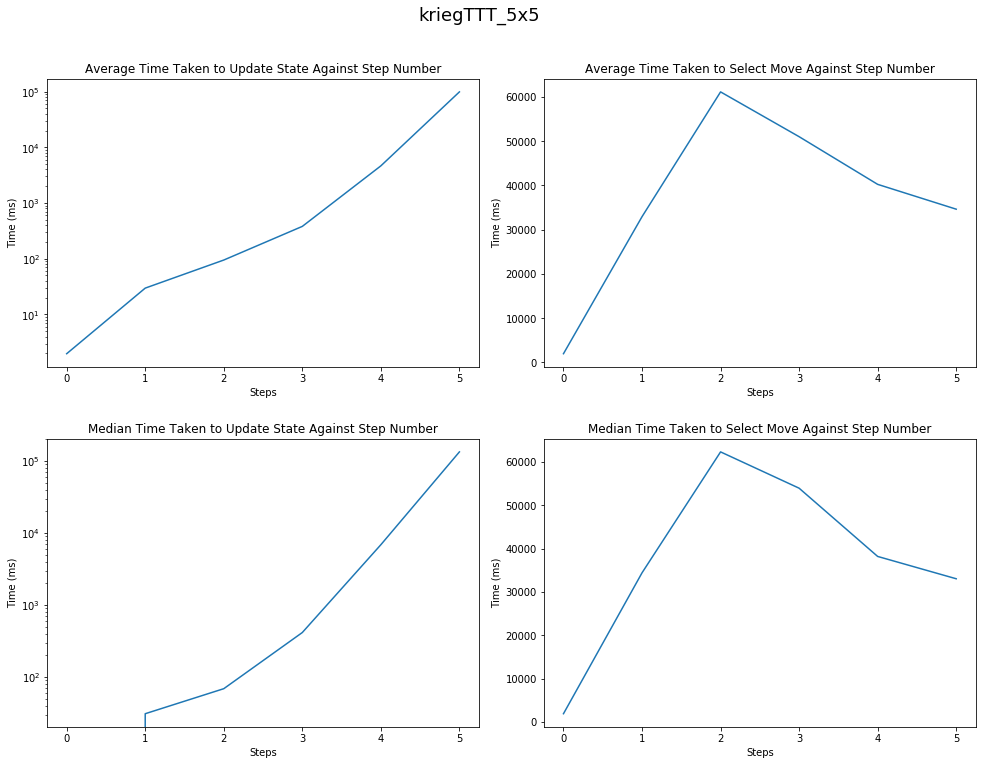

In [7]:
# Add the data to an array
mean_state_update_times = list()
mean_move_select_times = list()
median_state_update_times = list()
median_move_select_times = list()
for update_step, select_step in zip(time_to_update_list, time_to_select_move_list):
    mean_state_update_times.append(update_step.getMeanTime())
    mean_move_select_times.append(select_step.getMeanTime())
    median_state_update_times.append(update_step.getMedianTime())
    median_move_select_times.append(select_step.getMedianTime())

# Put into graphs
fig = plt.figure()
fig.suptitle(str(data['game_name'][0]), x=1, y=2.5, fontsize=18)

# Draw mean graph for State Update
ax1 = fig.add_axes([0,1.25,1,1], label='state_update')
ax1.set_title('Average Time Taken to Update State Against Step Number')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Time (ms)')
ax1.set_yscale('log')
ax1.set_xticks(range(0,len(mean_state_update_times)))
ax1.plot(mean_state_update_times)

# Draw mean graph for Move Select
ax2 = fig.add_axes([1.15,1.25,1,1], label='move_select')
ax2.set_title('Average Time Taken to Select Move Against Step Number')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Time (ms)')
ax2.set_yscale('linear')
ax2.set_xticks(range(0,len(mean_move_select_times)))
ax2.plot(mean_move_select_times)

# Draw median graph for State Update
ax3 = fig.add_axes([0,0,1,1], label='state_update_median')
ax3.set_title('Median Time Taken to Update State Against Step Number')
ax3.set_xlabel('Steps')
ax3.set_ylabel('Time (ms)')
ax3.set_yscale('log')
ax3.set_xticks(range(0,len(median_state_update_times)))
ax3.plot(median_state_update_times)

# Draw median graph for Move Select
ax4 = fig.add_axes([1.15,0,1,1], label='move_select_median')
ax4.set_title('Median Time Taken to Select Move Against Step Number')
ax4.set_xlabel('Steps')
ax4.set_ylabel('Time (ms)')
ax4.set_yscale('linear')
ax4.set_xticks(range(0,len(median_move_select_times)))
ax4.plot(median_move_select_times)

plt.show()